<a href="https://colab.research.google.com/github/Jv9545/Trabalho2_AnaliseDados/blob/main/Trabalho2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Preparando base**

**Importação de Bibliotecas**



In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


**Carregado Base**

In [61]:
df = pd.read_csv('/content/sample_data/06_rotatividade_clientes_bancários.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
6,7,15592531,Bartlett,822,NaN,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.50,0
9,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0


**Polindo base**

In [62]:
#Removendo colunas não usadas
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# Verificando valores nulos
df.isnull().sum().rename('Quantidade').sort_values(ascending=False)

# Excluindo linhas com valores nulos
df.dropna(inplace=True)

Aplicando One-Hot Encoding nas colunas 'Geography' e 'Gender'

In [63]:
df_codificado = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
df_codificado.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42.0,2,0.00,1,1.0,1.0,101348.88,1,False,False,False
1,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0,False,True,False
2,502,42.0,8,159660.80,3,1.0,0.0,113931.57,1,False,False,False
3,699,39.0,1,0.00,2,0.0,0.0,93826.63,0,False,False,False
5,645,44.0,8,113755.78,2,1.0,0.0,149756.71,1,False,True,True


# **Algoritmos Regressão**

**Criando DF com os resultados**

In [64]:
tabela = {
    'Algoritmo': ['Regressão Linear', 'Árvore de Regressão', 'Random Forest', 'SVR'],
    'RMSE': [0, 0, 0, 0]
}

resultados = pd.DataFrame(tabela)

**Separando variavel alvo 'CreditScore'**

In [65]:
X = df_codificado.drop(columns=['CreditScore', 'Exited'])
y = df_codificado['CreditScore']

**Seprando dados treino/teste no modelo Hold-out (70%/30%)**

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Definindo função para apresentar resultados de cada algoritmo**

In [67]:
def avaliar_modelo(y_true, y_pred, nome="Modelo"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return rmse

# **Executando algoritmos e armazenando resultados para comparação**

**Regressão Linear**

In [68]:
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

pred_lr = modelo_lr.predict(X_test)

resultados.iloc[0, 1] = avaliar_modelo(y_test, pred_lr, "Regressão Linear")
resultados.head()

/tmp/ipython-input-68-990104817.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '96.88331547963305' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  resultados.iloc[0, 1] = avaliar_modelo(y_test, pred_lr, "Regressão Linear")


,Algoritmo,RMSE
0,Regressão Linear,96.883315
1,Árvore de Regressão,0.000000
2,Random Forest,0.000000
3,SVR,0.000000


**Árvore de Regressão**

In [69]:
modelo_tree = DecisionTreeRegressor(random_state=42)
modelo_tree.fit(X_train, y_train)

pred_tree = modelo_tree.predict(X_test)
resultados.iloc[1, 1] = avaliar_modelo(y_test, pred_tree, "Árvore de Regressão")
resultados.head()

,Algoritmo,RMSE
0,Regressão Linear,96.883315
1,Árvore de Regressão,141.401642
2,Random Forest,0.000000
3,SVR,0.000000


**Random Forest Regressor**

In [70]:
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

pred_rf = modelo_rf.predict(X_test)
resultados.iloc[2, 1] = avaliar_modelo(y_test, pred_rf, "Random Forest")
resultados.head()

,Algoritmo,RMSE
0,Regressão Linear,96.883315
1,Árvore de Regressão,141.401642
2,Random Forest,99.442405
3,SVR,0.000000


**Support Vector Regressor (SVR)**

In [71]:
modelo_svr = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=100, epsilon=0.1))
modelo_svr.fit(X_train, y_train)

pred_svr = modelo_svr.predict(X_test)
resultados.iloc[3, 1] = avaliar_modelo(y_test, pred_svr, "SVR")
resultados.head()

,Algoritmo,RMSE
0,Regressão Linear,96.883315
1,Árvore de Regressão,141.401642
2,Random Forest,99.442405
3,SVR,98.812148


# **Comparativo**

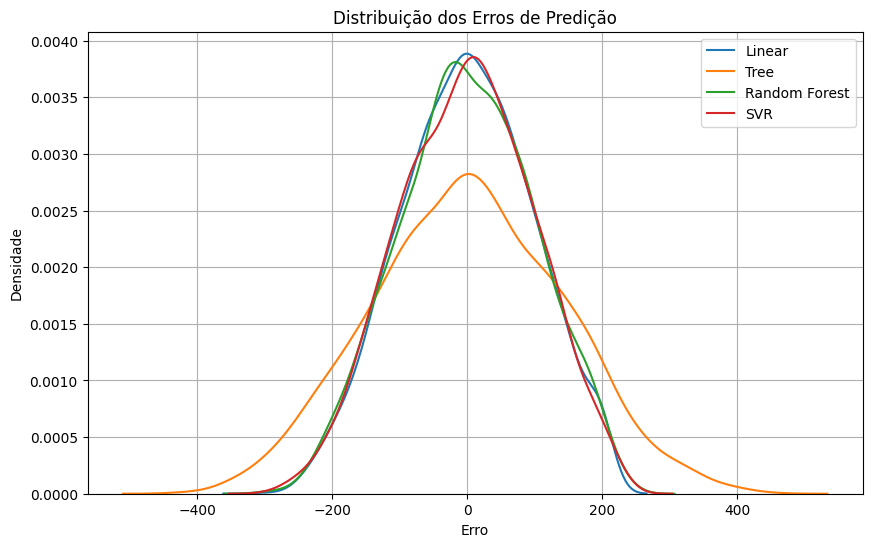

In [59]:
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test - pred_lr, label="Linear")
sns.kdeplot(y_test - pred_tree, label="Tree")
sns.kdeplot(y_test - pred_rf, label="Random Forest")
sns.kdeplot(y_test - pred_svr, label="SVR")

plt.title("Distribuição dos Erros de Predição")
plt.xlabel("Erro")
plt.ylabel("Densidade")
plt.grid(True)
plt.legend()
plt.show()